In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('place.csv')
df.sample(3)

,marks,experience,placed
125,61,21,1
140,76,2,1
152,6,3,0


In [3]:
df.shape

(230, 3)

In [4]:
df.isnull().sum()

marks         0
experience    0
placed        0
dtype: int64

In [5]:
df['placed'].value_counts()# this data is imbalanced

placed
1    131
0     99
Name: count, dtype: int64

In [6]:
#split x and y
x = df.drop(columns='placed')
y = df['placed']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [8]:
df.describe()

,marks,experience,placed
count,230.000000,230.000000,230.000000
mean,44.060870,14.769565,0.569565
std,29.057926,8.794795,0.496217
min,1.000000,1.000000,0.000000
25%,19.250000,7.000000,0.000000
50%,39.000000,15.000000,1.000000
75%,67.000000,23.000000,1.000000
max,100.000000,30.000000,1.000000


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
y_pred_train= lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(roc_auc_score(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

0.9557692307692308
[[19  1]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        26

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



In [12]:
from mlxtend.plotting import plot_decision_regions

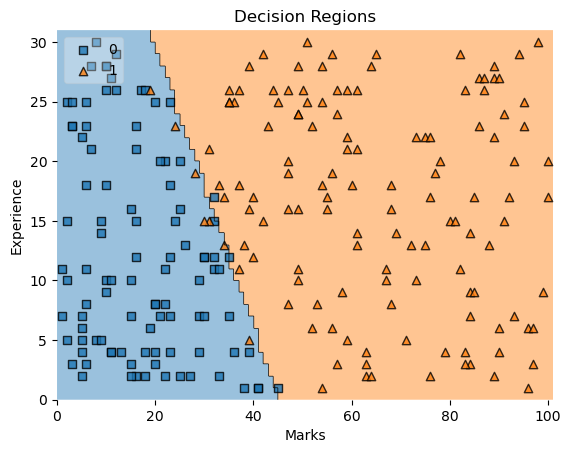

In [13]:
plot_decision_regions(x.values, y.values, clf=lr, legend=2)
plt.xlabel('Marks')
plt.ylabel('Experience')
plt.title('Decision Regions')
plt.show()

<Axes: >

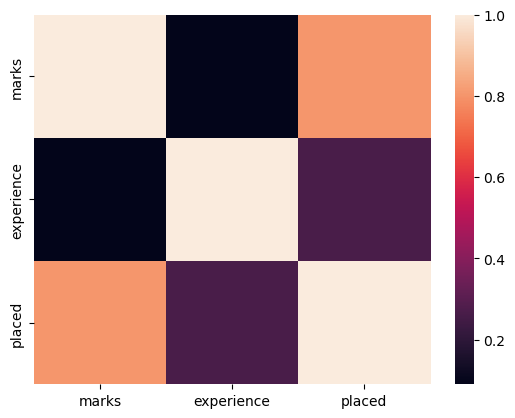

In [14]:
sns.heatmap(df.corr(numeric_only=True))

### Performance of Classification Models